In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
from src.env import *
from src.imports import *
from src.config import *
from src.dataset import *
from src.metric import *

Found cached dataset generator (C:/tempjeka/cache/huggingface/generator/default-f628ff2f2d994b84/0.0.0)
Loading cached split indices for dataset at C:\tempjeka\cache\huggingface\generator\default-f628ff2f2d994b84\0.0.0\cache-a84cfc0a0e11ed54.arrow and C:\tempjeka\cache\huggingface\generator\default-f628ff2f2d994b84\0.0.0\cache-665145fe0a5a6a51.arrow
Loading cached split indices for dataset at C:\tempjeka\cache\huggingface\generator\default-f628ff2f2d994b84\0.0.0\cache-e104a2bffe25c7fa.arrow and C:\tempjeka\cache\huggingface\generator\default-f628ff2f2d994b84\0.0.0\cache-4096519e2393e19f.arrow


<IPython.core.display.Javascript object>

In [3]:
enc_name = "bert-base-multilingual-cased"
dec_name = "ai-forever/rugpt3small_based_on_gpt2"
# dec_name = "bert-base-multilingual-cased"
model_name = "bert2gpt"

<IPython.core.display.Javascript object>

In [4]:
enc_tokenizer = AutoTokenizer.from_pretrained(enc_name)
enc_tokenizer.bos_token = enc_tokenizer.cls_token
enc_tokenizer.eos_token = enc_tokenizer.sep_token

<IPython.core.display.Javascript object>

In [5]:
from transformers import GPT2TokenizerFast

dec_tokenizer = GPT2TokenizerFast.from_pretrained(dec_name)
# dec_tokenizer.pad_token = dec_tokenizer.unk_token
dec_tokenizer.add_special_tokens({"pad_token": enc_tokenizer.pad_token})

# dec_tokenizer.bos_token = enc_tokenizer.cls_token
# dec_tokenizer.eos_token = enc_tokenizer.sep_token

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


1

<IPython.core.display.Javascript object>

In [6]:
dataset = create_dataset(enc_tokenizer, dec_tokenizer)

Loading cached processed dataset at C:\tempjeka\cache\huggingface\generator\default-f628ff2f2d994b84\0.0.0\cache-d63b730755503f10.arrow
Loading cached processed dataset at C:\tempjeka\cache\huggingface\generator\default-f628ff2f2d994b84\0.0.0\cache-c48910358007480a.arrow
Loading cached processed dataset at C:\tempjeka\cache\huggingface\generator\default-f628ff2f2d994b84\0.0.0\cache-1e3123ae84f08796.arrow


<IPython.core.display.Javascript object>

In [7]:
model = EncoderDecoderModel.from_encoder_decoder_pretrained(enc_name, dec_name)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of GPT2LMHeadModel were not initialized from the model checkpoint at ai-forever/rugpt3small_based_on_gpt2 and are newly initialized

<IPython.core.display.Javascript object>

In [8]:
model.config.decoder_start_token_id = dec_tokenizer.bos_token_id
model.config.pad_token_id = enc_tokenizer.pad_token_id


# model.config.decoder.eos_token_id = dec_tokenizer.eos_token_id
# model.config.decoder.bos_token_id = dec_tokenizer.bos_token_id
# model.config.vocab_size = model.config.decoder.vocab_size

# model.config.pad_token_id = model.config.decoder.eos_token_id
# # model.config.pad_token_id = dec_tokenizer.pad_token_id

# model.config.max_length = 142
# model.config.min_length = 10
# model.config.no_repeat_ngram_size = 3
# model.config.early_stopping = True
# model.config.num_beams = 4

# model.decoder.config.use_cache = False
# model.config

<IPython.core.display.Javascript object>

In [9]:
version = 33

<IPython.core.display.Javascript object>

In [13]:
version += 1
args = Seq2SeqTrainingArguments(
    output_dir=Path("models") / model_name,
    evaluation_strategy="steps",
    learning_rate=5e-5,
    lr_scheduler_type="constant_with_warmup",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    save_total_limit=1,
    num_train_epochs=2,
    predict_with_generate=True,
    warmup_steps=1000,
    fp16=True,
    logging_dir=f"../made/logs/lightning_logs/{model_name}/{version}",
    logging_first_step=False,
    eval_steps=1000,
    #     logging_steps=50,
    overwrite_output_dir=True,
    #     no_cuda=True,
)

<IPython.core.display.Javascript object>

In [14]:
trainer = Seq2SeqTrainer(
    model=model,
    args=args,
    compute_metrics=partial(compute_metrics, dec_tokenizer, metric),
    train_dataset=dataset["train"],
    eval_dataset=dataset["val"],
)

<IPython.core.display.Javascript object>

In [ ]:
trainer.train()

Step,Training Loss,Validation Loss,Bleu,Gen Len
1000,2.501600,2.204114,0.063267,97.320000
2000,2.342500,2.017530,0.076315,85.500000
3000,2.170400,1.903235,0.083174,83.100000
4000,2.016500,1.737057,0.103441,85.920000
5000,1.952000,1.678776,0.100255,80.680000
6000,1.907400,1.595508,0.122554,87.140000
7000,1.790200,1.510009,0.150492,87.700000
8000,1.732600,1.430141,0.137846,87.240000
9000,1.651100,1.347128,0.180037,86.460000
10000,1.572400,1.261100,0.178581,87.720000


C:\tempjeka\anaconda3\lib\site-packages\transformers\models\encoder_decoder\modeling_encoder_decoder.py:634: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWarning)
C:\tempjeka\anaconda3\lib\site-packages\transformers\generation\utils.py:1219: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use a generation configuration file (see https://huggingface.co/docs/transformers/main_classes/text_generation)
  warnings.warn(
C:\tempjeka\anaconda3\lib\site-packages\transformers\

C:\tempjeka\anaconda3\lib\site-packages\transformers\models\encoder_decoder\modeling_encoder_decoder.py:634: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNING, FutureWarning)
C:\tempjeka\anaconda3\lib\site-packages\transformers\models\encoder_decoder\modeling_encoder_decoder.py:634: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no 

In [ ]:
model.save_pretrained(model_name)

In [7]:
model = EncoderDecoderModel.from_pretrained(model_name)

<IPython.core.display.Javascript object>

In [42]:
metric = evaluate.load("bleu")
model.cuda()
model.eval()
with torch.no_grad():
    dataset["test"].map(partial(compute_metrics_test, dec_tokenizer, metric), batched=True, batch_size=batch_size)

Map:   0%|          | 0/4950 [00:00<?, ? examples/s]

<IPython.core.display.Javascript object>

In [43]:
metric.compute()

{'bleu': 0.2131901471615152,
 'precisions': [0.47200531906668936,
  0.29738961539105535,
  0.20625125518047213,
  0.14396965257009814],
 'brevity_penalty': 0.8390388437238083,
 'length_ratio': 0.8507030767004722,
 'translation_length': 64673,
 'reference_length': 76023}

<IPython.core.display.Javascript object>

Синий график 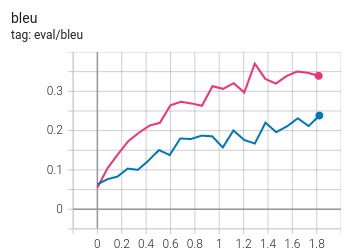 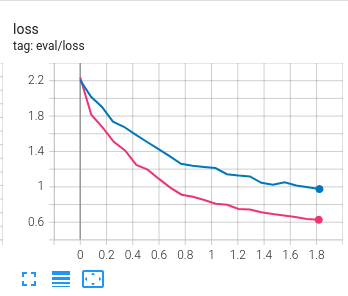 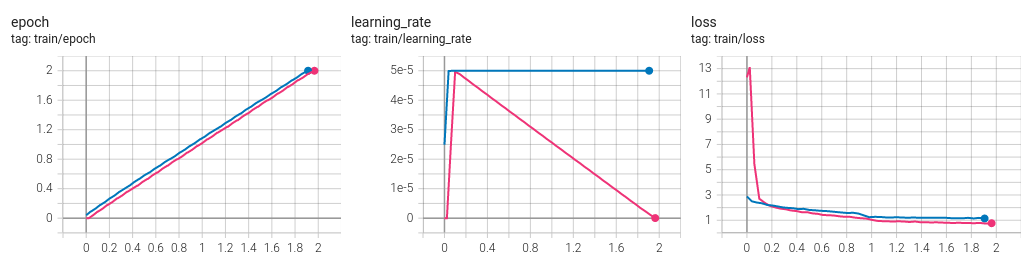